<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/07-Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Perceptrón
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Pablo Zambrano &bull; 2025-04
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos un perceptrón para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [34]:
# Paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs, fetch_openml
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

---
## <font color='264CC7'> Clasificación </font>

Se usará el conjunto de datos de dígitos de MNIST.

In [2]:
# Cargamos el dataset MNIST
X, y = fetch_openml('mnist_784', return_X_y=True, parser='auto')

In [23]:
y = y.astype(int)


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [4]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y.head()

,class
0,5
1,0
2,4
3,1
4,9


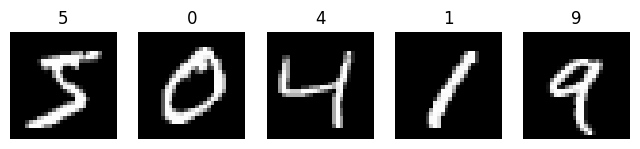

In [7]:
plt.figure(figsize=(8, 2))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(y[i])
    plt.axis('off')

plt.show()

In [8]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
X = X / 255.0


### <font color='264CC7'> Determinación de la red </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina una red neuronal para clasificar los datos:
<ul>
  <li>Define la red.</li>
  <li>Compila la red.</li>
  <li>Presenta un resumen de la red.</li>
</ul>
</div>


In [13]:
model = Sequential([
    Input(shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(
    optimizer=SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Al presentar este modelo es funcional con la arquitectura de mis datos MNIST en donde cada muestra la achata de la matriz y lo hace entrar como un vector plan, a la vez que las capas de las mismas muestran la capacidad de aprender patrones no lineales y softmax que convierte mis salidas en probabilidades es decir es un buen clasificador multiclase.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=17)

In [25]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1)


Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7031 - loss: 1.1070 - val_accuracy: 0.8959 - val_loss: 0.3884
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8941 - loss: 0.3848 - val_accuracy: 0.9112 - val_loss: 0.3170
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9099 - loss: 0.3198 - val_accuracy: 0.9175 - val_loss: 0.2827
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9176 - loss: 0.2874 - val_accuracy: 0.9243 - val_loss: 0.2609
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9282 - loss: 0.2586 - val_accuracy: 0.9286 - val_loss: 0.2403
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9338 - loss: 0.2398 - val_accuracy: 0.9330 - val_loss: 0.2271
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9366 - loss: 0.2233 - val_accuracy: 0.9380 - val_loss: 0.2143
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9438 - loss: 0.2049 - 

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Loss:", loss)
print("Accuracy:", accuracy)

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9503 - loss: 0.1744
Loss: 0.17772901058197021
Accuracy: 0.9487857222557068


In [30]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
Çcm = confusion_matrix(y_test, y_pred_classes)
cm

array([[1358,    0,    2,    4,    3,    5,   11,    3,    9,    0],
       [   1, 1540,    7,    2,    1,    5,    3,    3,    7,    3],
       [   6,   13, 1283,   14,    8,    1,   15,   19,   16,    1],
       [   2,    7,   23, 1315,    1,   29,    4,    9,   11,    7],
       [   2,    4,    6,    0, 1328,    1,    9,    2,    3,   31],
       [   8,    3,    3,   28,    7, 1175,   15,    1,    7,    9],
       [   6,    4,    7,    0,    4,   16, 1363,    1,    4,    0],
       [   2,   10,    8,    2,    7,    2,    0, 1422,    3,   18],
       [   6,   17,    8,   29,    5,   23,   17,    4, 1213,   13],
       [   9,    3,    1,   13,   24,   10,    2,   40,    5, 1286]])

In [35]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1395
           1       0.96      0.98      0.97      1572
           2       0.95      0.93      0.94      1376
           3       0.93      0.93      0.93      1408
           4       0.96      0.96      0.96      1386
           5       0.93      0.94      0.93      1256
           6       0.95      0.97      0.96      1405
           7       0.95      0.96      0.96      1474
           8       0.95      0.91      0.93      1335
           9       0.94      0.92      0.93      1393

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



La matriz de confusión presentada corresponde a valores absolutos, por lo que la diagonal representa el número de aciertos por clase y no probabilidades

- El modelo me clasifica correctamente el 95% de mis datod de prueba, el resultado no esta sesgado con otras clases y en si e modelo tiene una alta precision global

